## Bruno de Moraes Xavier da Silva
## João Victor Nascimento da Silva

Importação das bibliotecas necessárias

In [189]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from collections import Counter

Leitura dos dados de treino

In [190]:
raw_data = pd.read_csv('./datasets/train.csv', sep=',')
raw_data.shape

(14123, 70)

Removendo a coluna ID, pois ela irá impactar negativamente nos resultados

In [191]:
raw_data.drop(['id'], axis=1, inplace=True)

Copiando para o df_train

In [192]:
df_train = raw_data.copy()
df_train.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,18,19,2853,29442,1386,2435,35,-999,3,63,...,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,4,110,1986,13684,7189,-999,-999,17,3,63,...,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,0,39,1019,10232,678,791,16,-999,3,63,...,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,20,39,1751,2689,8235,1042,13,10,1,14,...,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,7,44,2262,29428,6031,304,16,-999,3,63,...,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1


Tentamos remover os registros que possuiam algum dado "-999", porém ao finalizar os testes, isso causou um impacto negativo na porcentagem de precisão

In [193]:
df_train_sem_999 = df_train.replace([-999], pd.NA)
df_train_sem_999.dropna(inplace=True)
df_train_sem_999.shape

(1085, 69)

Após o teste anterior, tentamos manter apenas as colunas que tivessem a maior correlação com a coluna y (resultado), porém novamente, pela remoção de muitos dados, a porcentagem de precisão diminuiu consideravelmente.

In [194]:
df_train_corr = df_train.corr()[['y']]
df_train_corr = df_train_corr[df_train_corr > 0]
df_train_corr.dropna(inplace=True)
df_train_mais_correlacao = df_train[df_train_corr.index.values.tolist()]
df_train_mais_correlacao.head()

,var4,var6,var7,var9,var10,var11,var12,var13,var14,var15,...,var59,var60,var61,var62,var63,var64,var65,var66,var68,y
0,29442,2435,35,3,63,6498,1166,2007,26,13,...,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.139706,1
1,13684,-999,-999,3,63,13989,497,2289,16,1,...,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.106618,0
2,10232,791,16,3,63,9739,562,641,10,34,...,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.242647,0
3,2689,1042,13,1,14,2890,6541,811,8,59,...,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.132353,0
4,29428,304,16,3,63,13541,7238,260,10,55,...,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.132353,1


Definindo os recursos de X e y, baseados no df_train padrão, já que as tentativas anteriores de tratamento não tiveram sucesso

In [195]:
X = df_train.loc[:, df_train.columns != 'y']
y = df_train['y']

Balanceando X e y, porém em variaveis diferentes das originais, pois vamos utilizar dos dois modos

In [196]:
oversample = SMOTE()
X_blc, y_blc = oversample.fit_resample(X,y)

Separando os dados de treino e teste desbalanceados

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    shuffle=True,
                                                    random_state=609)

Separando os dados de treino e teste balanceados

In [198]:
X_blc_train, X_blc_test, y_blc_train, y_blc_test = train_test_split(X_blc, y_blc,
                                                    test_size = 0.30,
                                                    shuffle=True,
                                                    random_state=609)

<hr>

# Modelo 1 - Regressão Logística
## Desbalanceado
Criando o modelo e o treinando com os dados

In [199]:
clr = LogisticRegression()
clr.fit(X_train, y_train)

c:\Users\joaov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Fazendo a predição

In [200]:
y_pred = clr.predict(X_test)

Printando o resultado da predição

In [201]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3370
           1       0.68      0.37      0.48       867

    accuracy                           0.84      4237
   macro avg       0.77      0.66      0.69      4237
weighted avg       0.82      0.84      0.82      4237



Como podemos analisar, a regressão logística desbalanceado obteve 77% de precisão média (macro avg/precision).
<br>
Isso é um resultado satisfatório.

Gerando uma Matrix de Confusão para facilitar a visualização dos falso-positivos

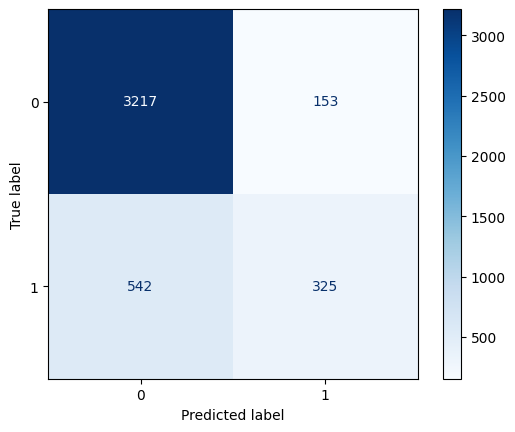

In [202]:

ConfusionMatrixDisplay.from_estimator(clr, X_test, y_test, cmap='Blues')

Como podemos ver, o modelo acertou muitos dos clientes que não compraram o produto, prevendo certo, pois o dataset possui muitos registros dessa categoria. Já para os clientes que compraram o produto, o modelo apresentou como Falso, errando a maioria dessa categoria.

## Balanceado
Criando o modelo e o treinando com os dados

In [203]:
clr_blc = LogisticRegression()
clr_blc.fit(X_blc_train, y_blc_train)

c:\Users\joaov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Fazendo a predição

In [204]:
y_blc_pred = clr_blc.predict(X_blc_test)

Printando o resultado da predição

In [205]:
print(classification_report(y_blc_test, y_blc_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      3392
           1       0.79      0.69      0.74      3372

    accuracy                           0.76      6764
   macro avg       0.76      0.76      0.76      6764
weighted avg       0.76      0.76      0.76      6764



Como podemos analisar, a regressão logística balanceado obteve 76% de precisão média (macro avg/precision).
<br>
Isso é um resultado satisfatório.

Gerando uma Matrix de Confusão para facilitar a visualização dos falso-positivos

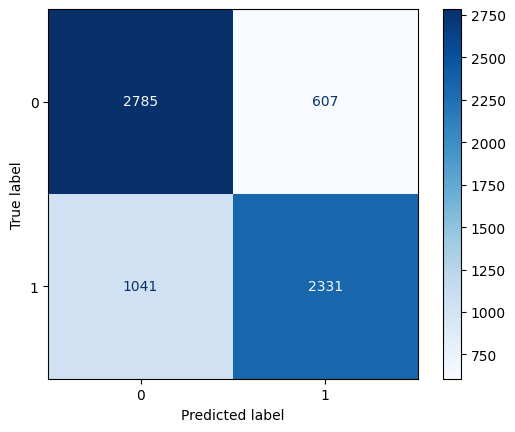

In [206]:

ConfusionMatrixDisplay.from_estimator(clr_blc, X_blc_test, y_blc_test, cmap='Blues')

Como podemos ver, o modelo acertou 82% dos casos onde o produto não seria comprado, e 69% dos casos onde ele seria comprado. Comparando com a versão desbalanceada, o modelo conseguiu um resultado mais homogenio, porém ao custo de uma menor precisão nos casos onde o produto não seria comprado.

<hr>

# Modelo 2 - KNN
## Desbalanceado
Criando o modelo e o treinando com os dados

In [207]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Fazendo a predição

In [208]:
y_pred = knn.predict(X_test)

Printando o resultado da predição

In [209]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3370
           1       0.63      0.41      0.49       867

    accuracy                           0.83      4237
   macro avg       0.74      0.67      0.69      4237
weighted avg       0.81      0.83      0.81      4237



Como podemos analisar, o KNN desbalanceado obteve 74% de precisão média (macro avg/precision).
<br>
Isso é um resultado satisfatório.

Gerando uma Matrix de Confusão para facilitar a visualização dos falso-positivos

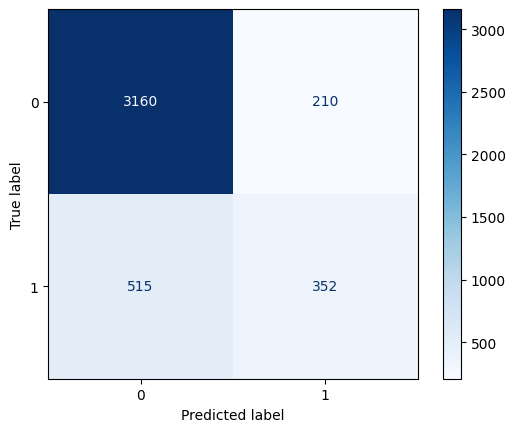

In [210]:

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')

Como podemos ver, o modelo acertou muitos dos clientes que não compraram o produto, prevendo certo, pois o dataset possui muitos registros dessa categoria. Já para os clientes que compraram o produto, o modelo apresentou como Falso, errando a maioria dessa categoria, porém ainda teve uma taxa de acerto interessante de 41%.

## Balanceado
Criando o modelo e o treinando com os dados

In [211]:
knn_blc = KNeighborsClassifier()
knn_blc.fit(X_blc_train, y_blc_train)

KNeighborsClassifier()

Fazendo a predição

In [212]:
y_blc_pred = knn_blc.predict(X_blc_test)

Printando o resultado da predição

In [213]:
print(classification_report(y_blc_test, y_blc_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      3392
           1       0.76      0.93      0.84      3372

    accuracy                           0.82      6764
   macro avg       0.84      0.82      0.82      6764
weighted avg       0.84      0.82      0.82      6764



Como podemos analisar, o KNN balanceado obteve 84% de precisão média (macro avg/precision).
<br>
Isso é um resultado muito satisfatório.

Gerando uma Matrix de Confusão para facilitar a visualização dos falso-positivos

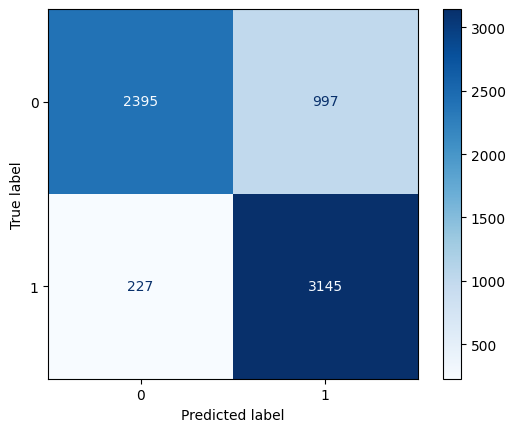

In [214]:

ConfusionMatrixDisplay.from_estimator(knn_blc, X_blc_test, y_blc_test, cmap='Blues')

Como podemos ver, o modelo acertou 71% dos casos onde o produto não seria comprado, e 93% dos casos onde ele seria comprado. Ele apresentou um resultado mais positivo para compras verdadeiras, porém apresentou mais falsos-positivos. Dependendo do interesse da empresa, este modelo muito atrativo.

<hr>

# Modelo 3 - Gaussian Naive Bayes
## Desbalanceado
Criando o modelo e o treinando com os dados

In [215]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Fazendo a predição

In [216]:
y_pred = gnb.predict(X_test)

Printando o resultado da predição

In [217]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.34      0.49      3370
           1       0.26      0.90      0.40       867

    accuracy                           0.45      4237
   macro avg       0.59      0.62      0.45      4237
weighted avg       0.79      0.45      0.48      4237



Como podemos analisar, o Gaussian Naive Bayes desbalanceado obteve 59% de precisão média (macro avg/precision).
<br>
Isso é um resultado mediamente satisfatório.

Gerando uma Matrix de Confusão para facilitar a visualização dos falso-positivos

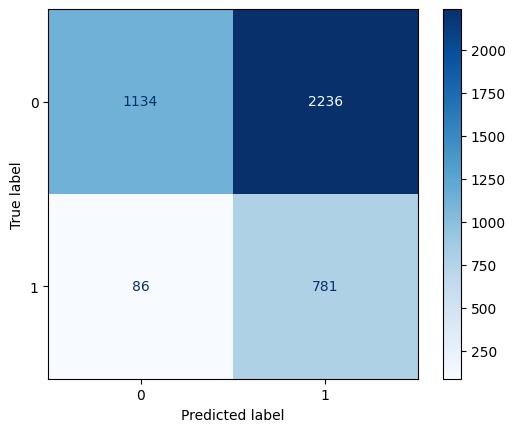

In [218]:

ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test, cmap='Blues')

Como podemos ver, o modelo errou muitos dos clientes que não compraram o produto, com apenas 34% de precisão. Porém ainda informou uma porção significativa de verdadeiro-negativos. Já para os clientes que compraram o produto, o modelo apresentou 90% de acerto, exibindo a maioria de verdadeiro-positivos.

## Balanceado
Criando o modelo e o treinando com os dados

In [219]:
gnb_blc = GaussianNB()
gnb_blc.fit(X_blc_train, y_blc_train)

GaussianNB()

Fazendo a predição

In [220]:
y_blc_pred = gnb_blc.predict(X_blc_test)

Printando o resultado da predição

In [221]:
print(classification_report(y_blc_test, y_blc_pred))

              precision    recall  f1-score   support

           0       0.78      0.31      0.44      3392
           1       0.57      0.91      0.70      3372

    accuracy                           0.61      6764
   macro avg       0.67      0.61      0.57      6764
weighted avg       0.67      0.61      0.57      6764



Como podemos analisar, o Gaussian Naive Bayes balanceado obteve 67% de precisão média (macro avg/precision).
<br>
Isso é um resultado satisfatório.

Gerando uma Matrix de Confusão para facilitar a visualização dos falso-positivos

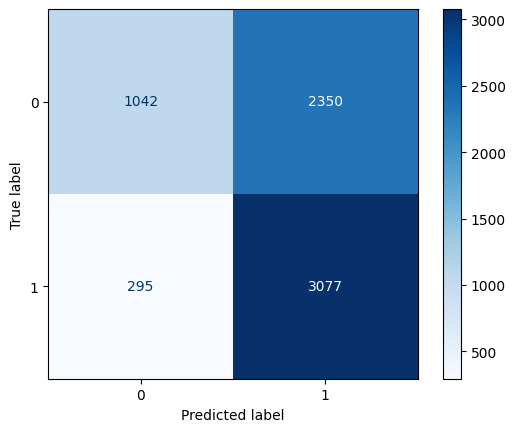

In [222]:

ConfusionMatrixDisplay.from_estimator(gnb_blc, X_blc_test, y_blc_test, cmap='Blues')

Como podemos ver, o modelo acertou 31% dos casos onde o produto não seria comprado, e 91% dos casos onde ele seria comprado. Ele apresentou um resultado mais positivo para compras verdadeiras, porém apresentou mais falsos-positivos. Ele se assemelhou ao KNN balanceado, porém apenas nos casos de compra, e no geral obteve uma precisão inferior, tornando-se menos atrativo.